In [4]:
#General libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

#Regular expression
import re

In [28]:
df = pd.read_csv('bgg tsne coordinates 100Perplexity 2000Steps.csv')

df.drop('Unnamed: 0', inplace=True, axis=1)
df['Ax1'] = df['Ax1'].astype(float)
df['Ax2'] = df['Ax2'].astype(float)

In [29]:
df.head()

,Game name,Ax1,Ax2
0,Pandemic Legacy: Season 1,1.469032,1.059907
1,Through the Ages: A New Story of Civilization,-0.717615,4.136002
2,Twilight Struggle,-2.007384,-2.909323
3,Gloomhaven,0.901640,2.072781
4,Star Wars: Rebellion,-0.815933,-2.684164


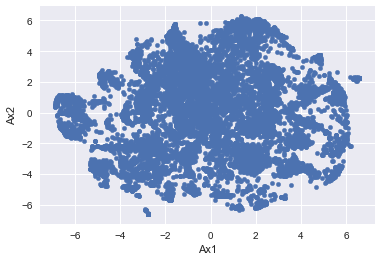

In [30]:
#Make the tsne plot again
df.plot(x='Ax1',y='Ax2',kind='scatter')

# Applying Dimensionality Reduction

https://www.kdnuggets.com/2015/05/7-methods-data-dimensionality-reduction.html

In [3]:
# Load csv we had saved
ga = pd.read_csv('bgg game attributes edited.csv')

#Drop the first column (just indices)
ga.drop('Column1', inplace=True, axis=1)

#Rename headers with the actual headings (stored in first row)
ga.rename(columns=ga.iloc[0], inplace=True)
ga.drop(0, inplace=True, axis=0)
ga.reset_index(drop=True, inplace=True)

C:\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2723: DtypeWarning: Columns (2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
#Set up PCA-dataset; remove text
ga_to_pca = ga.drop(['Game name','Game rank','Game ID','total categories','total mechanics'], axis=1)

In [5]:
# Normalize the non-binary values: #players, playtime, weight
#Import sklearn standardscaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

#Fit and Transform via standard scaler
scaler.fit(ga_to_pca[['#players','playtime','weight']])
scaled_ga = scaler.transform(ga_to_pca[['#players','playtime','weight']])

#Concatenate the normalized columns to the binary columns
scaled_ga = pd.concat([pd.DataFrame(scaled_ga, columns=['#players','playtime','weight']),ga_to_pca.drop(['#players','playtime','weight'],axis=1)],axis=1)

## PCA

In [5]:
# Import sklearn PCA
from sklearn.decomposition import PCA

#Apply PCA
pca = PCA()
ga_pca = pca.fit_transform(scaled_ga)

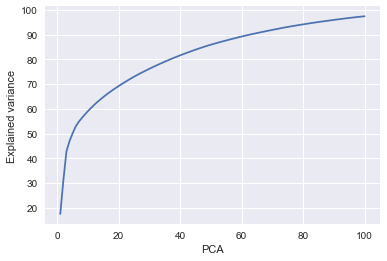

In [7]:
#Check what % variance is explained by each component
var_ex = pca.explained_variance_ratio_ * 100
var_cum = np.cumsum(var_ex[0:100])

plt.plot(np.arange(1,len(var_cum)+1),var_cum)
plt.xlabel('PCA')
plt.ylabel('Explained variance')

We only explain about 50% of the variance in the first 5-10 PCs. Only 70% explained in the first 20 PCs. Thus it seems safe to say that generally we can't easily reduce the number of dimensions via PCA without losing a lot of information.

It is highly recommended to use another dimensionality reduction method (e.g. PCA for dense data or TruncatedSVD for sparse data) to reduce the number of dimensions to a reasonable amount (e.g. 50)
 
 https://medium.com/@luckylwk/visualising-high-dimensional-datasets-using-pca-and-t-sne-in-python-8ef87e7915b

## TSNE
Since t-SNE scales quadratically in the number of objects N, its applicability is limited to data sets with only a few thousand input objects; beyond that, learning becomes too slow to be practical (and the memory requirements become too large).
 
 http://jotterbach.github.io/2016/05/23/TSNE/
 
 https://distill.pub/2016/misread-tsne/

In [8]:
# Import t-sne
from sklearn.manifold import TSNE

In [9]:
tsne = TSNE(n_components=2, verbose=1, perplexity=50, n_iter=300)

In [10]:
tsne_results = tsne.fit_transform(scaled_ga)

[t-SNE] Computing pairwise distances...
[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Computed conditional probabilities for sample 1000 / 13955
[t-SNE] Computed conditional probabilities for sample 2000 / 13955
[t-SNE] Computed conditional probabilities for sample 3000 / 13955
[t-SNE] Computed conditional probabilities for sample 4000 / 13955
[t-SNE] Computed conditional probabilities for sample 5000 / 13955
[t-SNE] Computed conditional probabilities for sample 6000 / 13955
[t-SNE] Computed conditional probabilities for sample 7000 / 13955
[t-SNE] Computed conditional probabilities for sample 8000 / 13955
[t-SNE] Computed conditional probabilities for sample 9000 / 13955
[t-SNE] Computed conditional probabilities for sample 10000 / 13955
[t-SNE] Computed conditional probabilities for sample 11000 / 13955
[t-SNE] Computed conditional probabilities for sample 12000 / 13955
[t-SNE] Computed conditional probabilities for sample 13000 / 13955
[t-SNE] Computed conditional probabilities

In [11]:
tsne_results

array([[ 1.06520023,  2.94004888],
       [ 2.26236456, -0.81213086],
       [-4.2620571 ,  0.23260265],
       ..., 
       [ 1.91894179, -4.61298685],
       [ 1.80064465, -4.68623775],
       [ 6.01850485, -2.51697917]])

In [12]:
df = pd.concat([ga['Game name'],
                pd.DataFrame(tsne_results, columns=['Ax1','Ax2'])],
               axis=1)

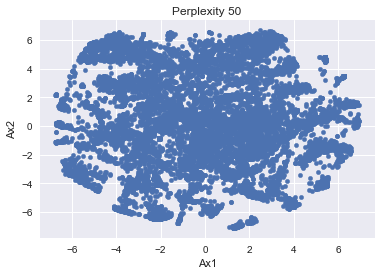

In [14]:
# See the t-sne plot and save it
ts= df.plot(x='Ax1',y='Ax2',kind='scatter',title='Perplexity 50')

ts.get_figure().savefig('ts_50perp.png')

In [16]:
# Save our tsne results for future use
df.to_csv('bgg tsne coordinates.csv', encoding='utf-8')

## Interactive Plot

We can also graph the data to an interactive plot if we want to do some light exploration.

In [11]:
# Import plotly and cufflinks

from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

print(__version__) # requires version >= 1.9.0

import plotly.graph_objs as go

import cufflinks as cf

# For Notebooks
init_notebook_mode(connected=True)

# For offline use
cf.go_offline()

2.4.1


IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.


In [85]:
df.iplot(kind='scatter',x='Ax1',y='Ax2',mode='markers',size=5,text='Game name')

## Testing t-sne Perplexity and Steps

Reading over t-sne, it seems that perplexity and steps (n-iter) are parameters that can be adjusted to make sure the t-sne algorithm is performing well and not generating unexpected clusters. I'll code a test to generate plots for different perplexities and steps.

In [ ]:
perp = [10,30,50,100,200]
iterations = [200, 500, 1000, 2000]

for i in iterations:
#    tsne = TSNE(n_components=2, verbose=1, perplexity=i, n_iter=1000)
    tsne = TSNE(n_components=2, verbose=1, perplexity=50, n_iter=i)
    tsne_results = tsne.fit_transform(scaled_ga)
    
    df = pd.concat([ga['Game name'], pd.DataFrame(tsne_results, columns=['Ax1','Ax2'])],axis=1)
    
    # See the t-sne plot and save it
    out = str(i) + ' Steps, 50 perplexity'
    ts= df.plot(x='Ax1',y='Ax2',kind='scatter',title=out)
    
    out = 'ts_'+out+'.png'
    ts.get_figure().savefig(out)
    
    out = 'bgg tsne cluster '+ str(i) + ' Steps, 50 perplexity '  + '.csv'
    df.to_csv(out, encoding='utf-8')

Seems a Perplexity of 100 and steps of 2000 generates a plot that looks good. We'll rerun the code above with those parameters. In the process, we'll also define a function.

In [33]:
def game_tsne(perp=100, steps=2000):
    # Import t-sne
    from sklearn.manifold import TSNE
    #Import sklearn standardscaler
    from sklearn.preprocessing import StandardScaler
    
    
    # Load csv we had saved
    ga = pd.read_csv('bgg game attributes edited.csv')

    #Drop the first column (just indices)
    ga.drop('Column1', inplace=True, axis=1)

    #Rename headers with the actual headings (stored in first row)
    ga.rename(columns=ga.iloc[0], inplace=True)
    ga.drop(0, inplace=True, axis=0)
    ga.reset_index(drop=True, inplace=True)
    
    #Set up PCA-dataset; remove text
    ga_to_dimred = ga.drop(['Game name','Game rank','Game ID','total categories','total mechanics'], axis=1)
    
    # Normalize the non-binary values: #players, playtime, weight
    
    scaler = StandardScaler()

    #Fit and Transform via standard scaler
    scaler.fit(ga_to_dimred[['#players','playtime','weight']])
    scaled_ga = scaler.transform(ga_to_pca[['#players','playtime','weight']])

    #Concatenate the normalized columns to the binary columns
    scaled_ga = pd.concat([pd.DataFrame(scaled_ga, columns=['#players','playtime','weight']),ga_to_pca.drop(['#players','playtime','weight'],axis=1)],axis=1)
    
    
    tsne = TSNE(n_components=2, verbose=1, perplexity=perp, n_iter=steps)
    tsne_results = tsne.fit_transform(scaled_ga)
    
    df = pd.concat([ga['Game name'], pd.DataFrame(tsne_results, columns=['Ax1','Ax2'])],axis=1)
    
    # See the t-sne plot and save it
    out = str(perp) + ' Perplexity, ' + str(steps) + ' Steps'
    ts= df.plot(x='Ax1',y='Ax2',kind='scatter',title=out)
    
    out = 'game_tsne '+out+'.png'
    ts.get_figure().savefig(out)
    
    out = 'bgg tsne coordinates '+ str(perp) + 'Perplexity ' + str(steps) + 'Steps.csv'
    df.to_csv(out, encoding='utf-8')

C:\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2831: DtypeWarning:

Columns (2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143) have mixed types. Specify dtype option on import or set low_memory=False.



[t-SNE] Computing pairwise distances...
[t-SNE] Computing 301 nearest neighbors...
[t-SNE] Computed conditional probabilities for sample 1000 / 13955
[t-SNE] Computed conditional probabilities for sample 2000 / 13955
[t-SNE] Computed conditional probabilities for sample 3000 / 13955
[t-SNE] Computed conditional probabilities for sample 4000 / 13955
[t-SNE] Computed conditional probabilities for sample 5000 / 13955
[t-SNE] Computed conditional probabilities for sample 6000 / 13955
[t-SNE] Computed conditional probabilities for sample 7000 / 13955
[t-SNE] Computed conditional probabilities for sample 8000 / 13955
[t-SNE] Computed conditional probabilities for sample 9000 / 13955
[t-SNE] Computed conditional probabilities for sample 10000 / 13955
[t-SNE] Computed conditional probabilities for sample 11000 / 13955
[t-SNE] Computed conditional probabilities for sample 12000 / 13955
[t-SNE] Computed conditional probabilities for sample 13000 / 13955
[t-SNE] Computed conditional probabilities

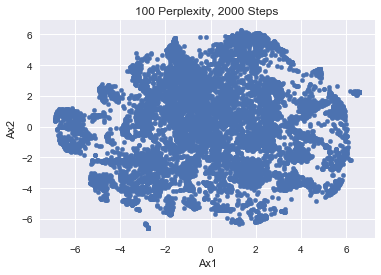

In [32]:
game_tsne(perp=100, steps=2000)